In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [51]:
data = pd.read_csv("data/synthetic_asthma_dataset.csv")
data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [52]:
data.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [53]:
data.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

## Correlation calculation among all numerical features.

#### selecting columns with numerical features

In [54]:
num_data = data.select_dtypes(include=np.number)
num_data.head()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,27.6,1,0.38,0,421.0,46.0,0
1,15,24.6,0,0.60,2,297.6,22.9,0
2,72,17.6,0,0.38,0,303.3,15.3,0
3,61,16.8,0,0.60,1,438.0,40.1,1
4,21,30.2,0,0.82,3,535.0,27.7,0


#### Correlation Matrix for numerical features

In [55]:
corr1 = num_data.corr()
corr1

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
Age,1.000000,-0.010078,0.007481,-0.005332,-0.014775,0.012447,0.012180,-0.004346
BMI,-0.010078,1.000000,-0.001244,-0.001318,0.003024,-0.000559,-0.005137,0.098425
Family_History,0.007481,-0.001244,1.000000,0.019463,0.020411,-0.009463,0.005389,0.409531
Medication_Adherence,-0.005332,-0.001318,0.019463,1.000000,-0.001243,-0.012747,0.019040,0.003785
Number_of_ER_Visits,-0.014775,0.003024,0.020411,-0.001243,1.000000,0.001293,0.009969,0.005781
Peak_Expiratory_Flow,0.012447,-0.000559,-0.009463,-0.012747,0.001293,1.000000,0.000575,-0.005207
FeNO_Level,0.012180,-0.005137,0.005389,0.019040,0.009969,0.000575,1.000000,0.007012
Has_Asthma,-0.004346,0.098425,0.409531,0.003785,0.005781,-0.005207,0.007012,1.000000


#### Correlation matrix on heatmap

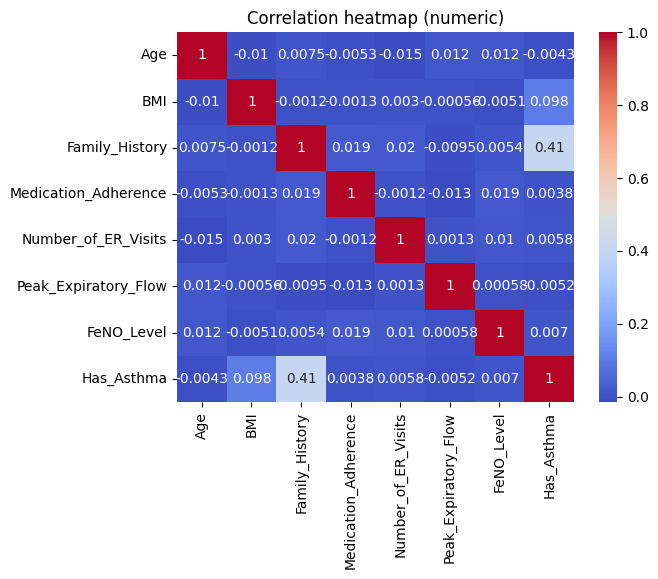

In [56]:
sb.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (numeric)")
plt.show()

## Visualizing the dataset

#### impact of Peak Expiratory flow to asthma vs. non-asthma groups

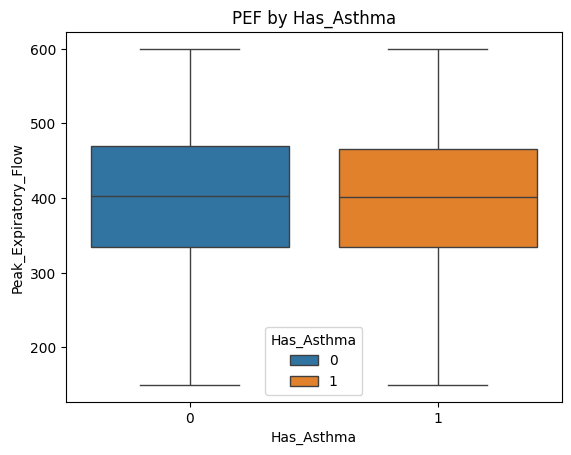

In [57]:
sb.boxplot(x="Has_Asthma", y="Peak_Expiratory_Flow",hue="Has_Asthma", data=num_data)
plt.title("PEF by Has_Asthma")
plt.show()

#### Age, BMI by Asthma status¶

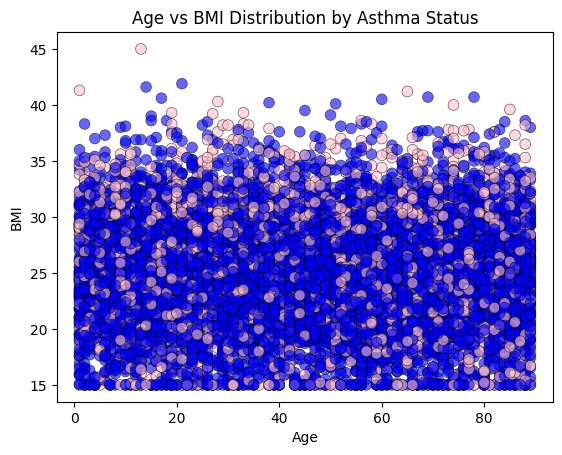

In [58]:
colors = ['blue' if x == 0 else 'pink' for x in num_data['Has_Asthma']]
plt.scatter(num_data["Age"] , num_data['BMI'], c= colors, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
plt.title('Age vs BMI Distribution by Asthma Status')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [59]:
data["Has_Asthma"].value_counts()

Has_Asthma
0    7567
1    2433
Name: count, dtype: int64

#### compare Total count of Asthma vs non-Asthma Group

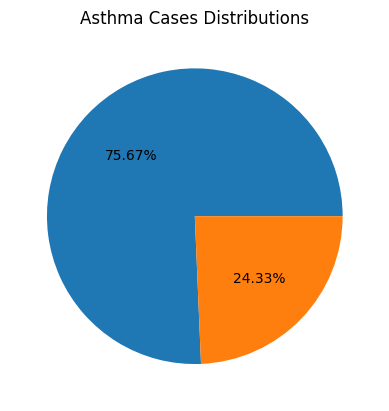

In [60]:
asthma_count = data["Has_Asthma"].value_counts()
plt.pie(asthma_count, autopct="%1.2f%%")
plt.title("Asthma Cases Distributions")
plt.show()

#### Plot to Compare Family History vs Has Asthma Status

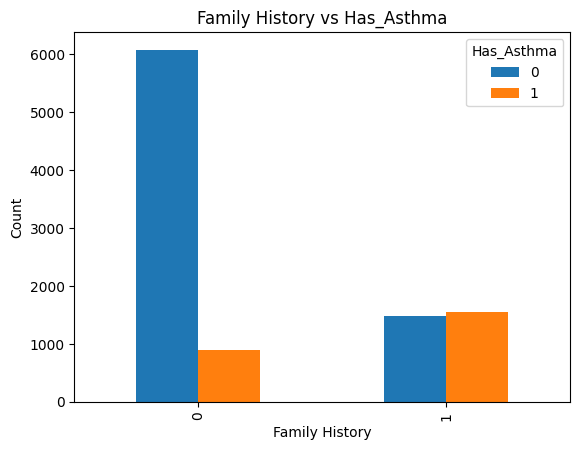

In [61]:
pd.crosstab(num_data["Family_History"], num_data["Has_Asthma"]).plot(kind='bar',stacked=False)
plt.title("Family History vs Has_Asthma")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()

## Partitioning the Dataset

#### Droping the Has Asthma from dataset

In [62]:
X = num_data.drop(columns=["Has_Asthma"])
print(f"\n Features of the dataset\n {X.head()}")


 Features of the dataset
    Age   BMI  Family_History  Medication_Adherence  Number_of_ER_Visits  \
0   52  27.6               1                  0.38                    0   
1   15  24.6               0                  0.60                    2   
2   72  17.6               0                  0.38                    0   
3   61  16.8               0                  0.60                    1   
4   21  30.2               0                  0.82                    3   

   Peak_Expiratory_Flow  FeNO_Level  
0                 421.0        46.0  
1                 297.6        22.9  
2                 303.3        15.3  
3                 438.0        40.1  
4                 535.0        27.7  


#### Creating target

In [63]:
y = num_data["Has_Asthma"]
print(f"\n Target of the dataset \n {y.head()}")


 Target of the dataset 
 0    0
1    0
2    0
3    1
4    0
Name: Has_Asthma, dtype: int64


#### Split the features and target to train and test set

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 7)
(3000, 7)
(7000,)
(3000,)


#### Creating ModelOne Without Paramater

In [65]:
modelOne  = DecisionTreeClassifier()
modelOne.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Model Tree

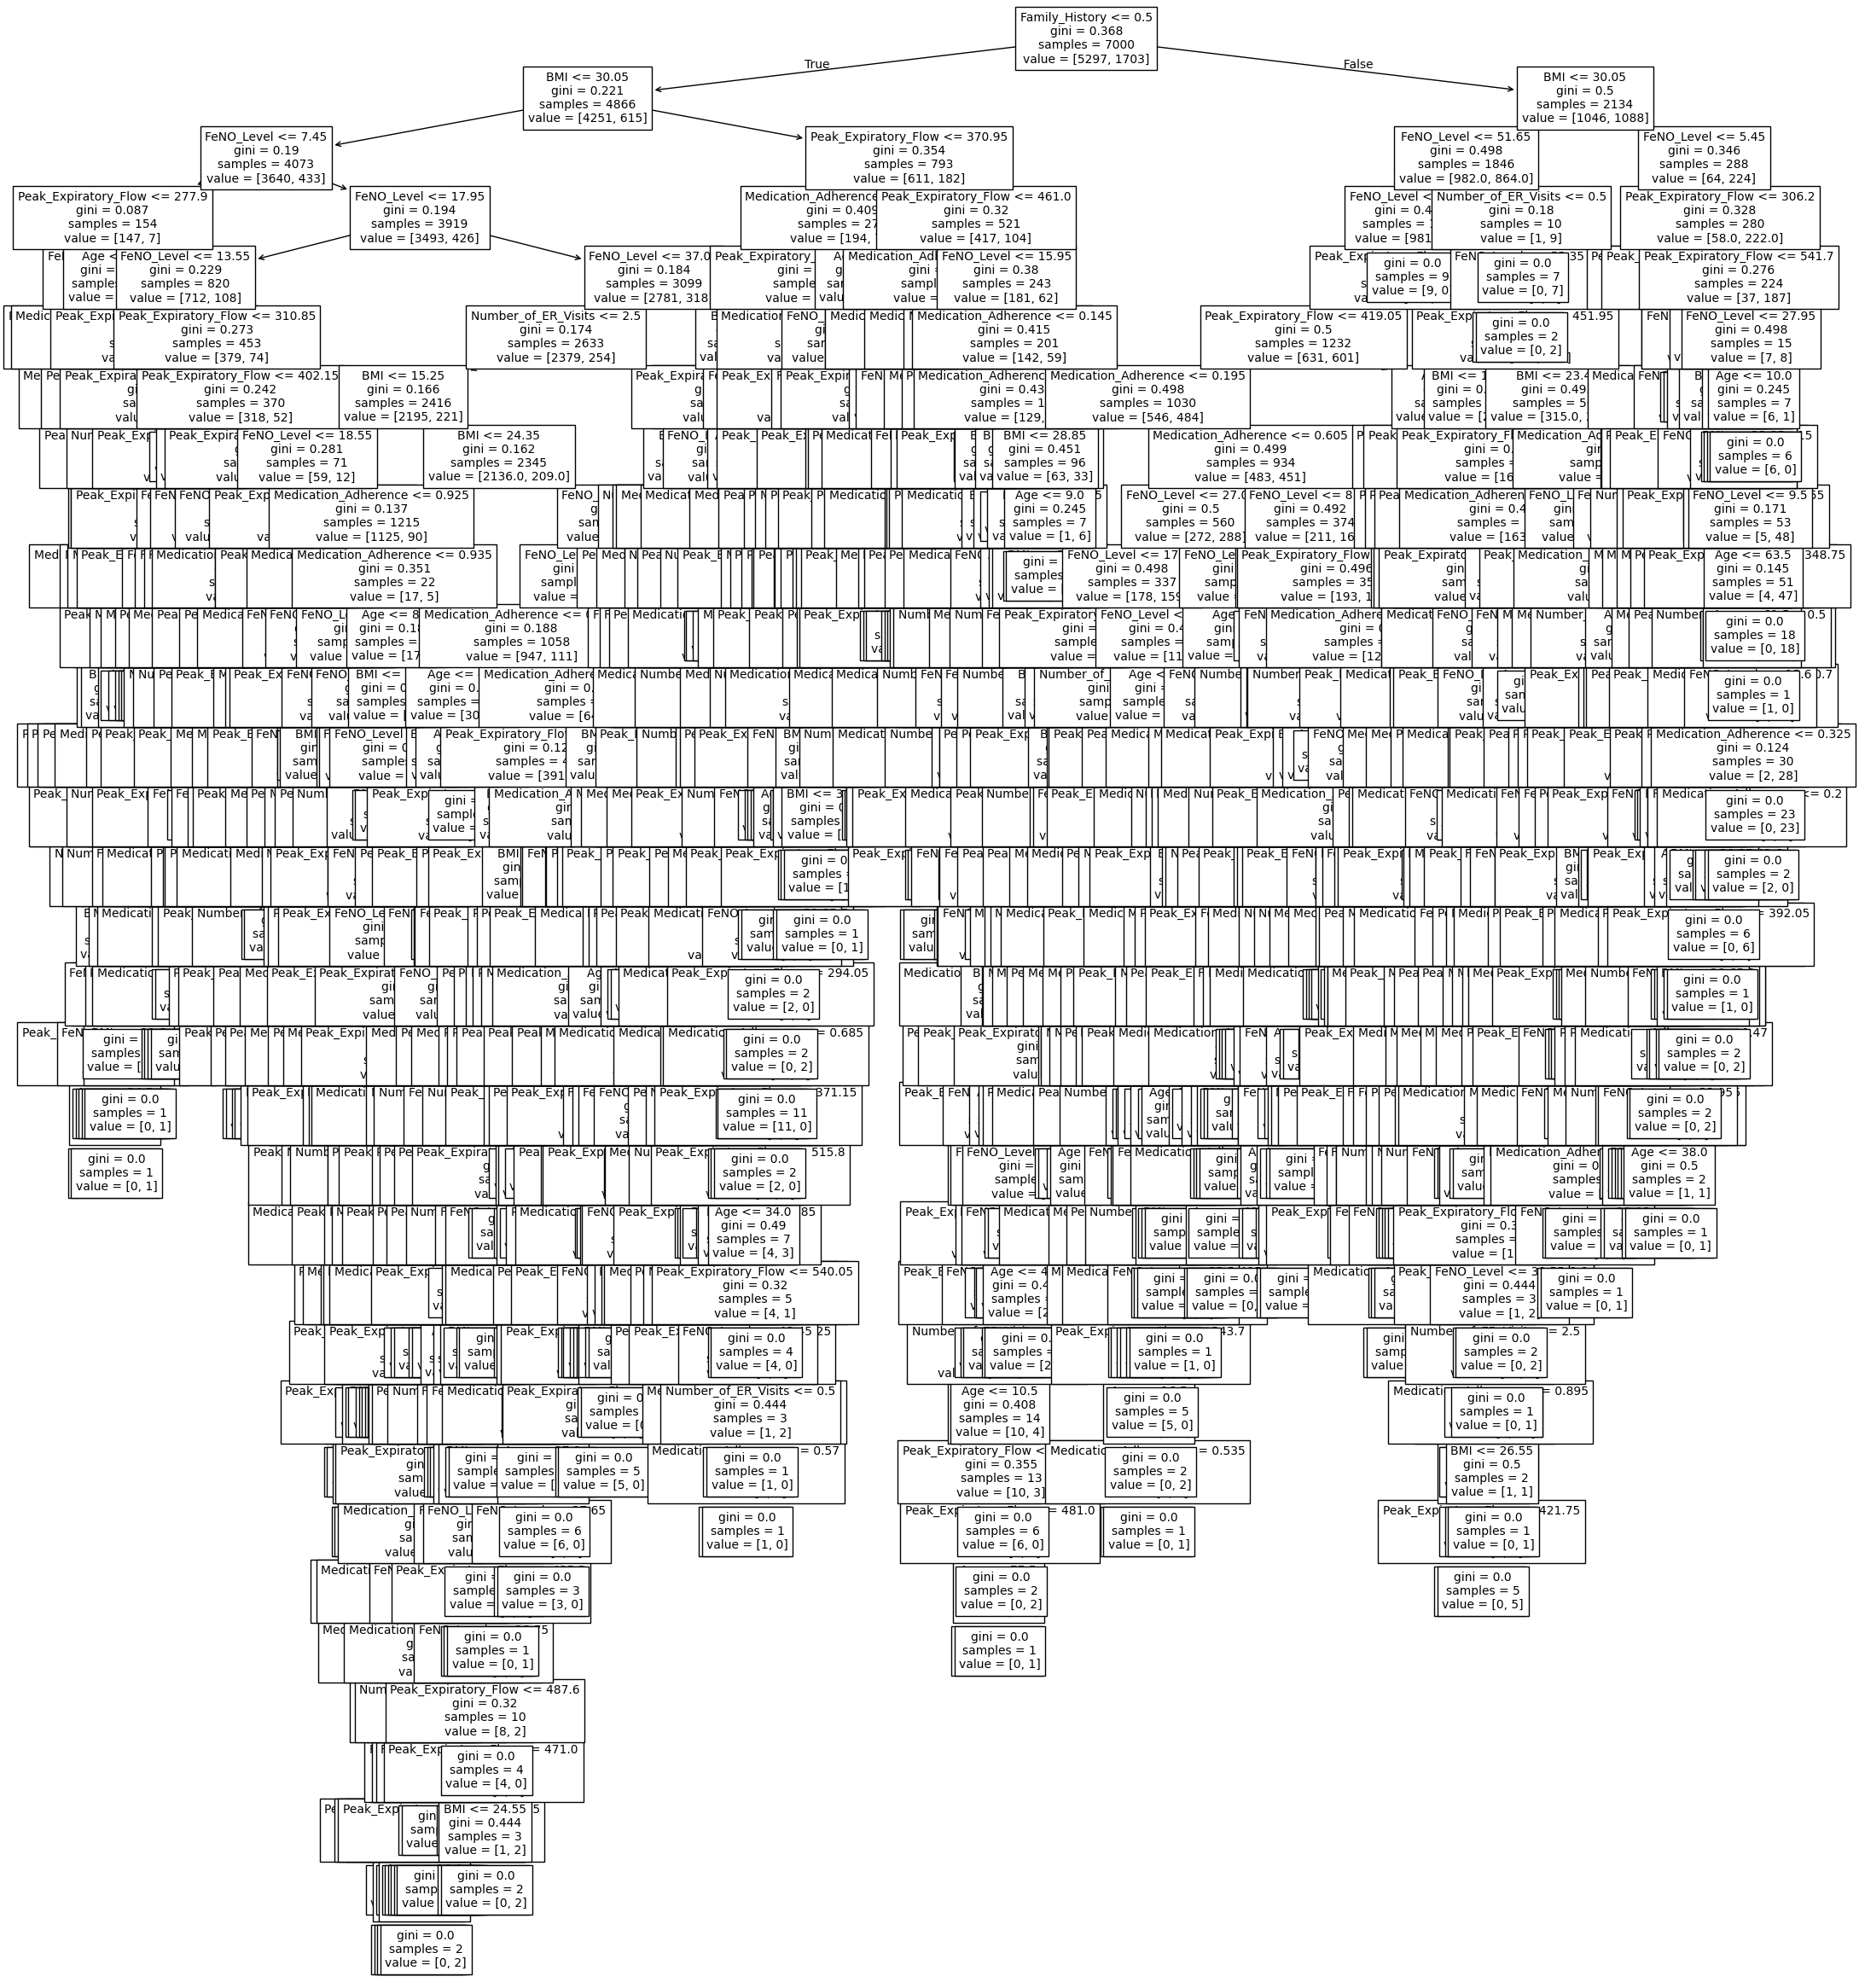

In [66]:
f1 = num_data.columns
plt.figure(figsize=(25,30))
tree.plot_tree(modelOne,feature_names=f1, fontsize=10)
plt.show()

## Prediction of model one and Test of Accuracy

#### Prediction of the first model

In [67]:
predOne = modelOne.predict(x_test)

#### Metrics Evaluation

In [68]:
metrics.accuracy_score(predOne, y_test)

0.6916666666666667

In [69]:
print(metrics.classification_report(predOne, y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2241
           1       0.39      0.37      0.38       759

    accuracy                           0.69      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.69      0.69      0.69      3000



## Models with Parameters

#### adding Max_depth Parameter

In [70]:
modelTwo  = DecisionTreeClassifier(max_depth=3)
modelTwo.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


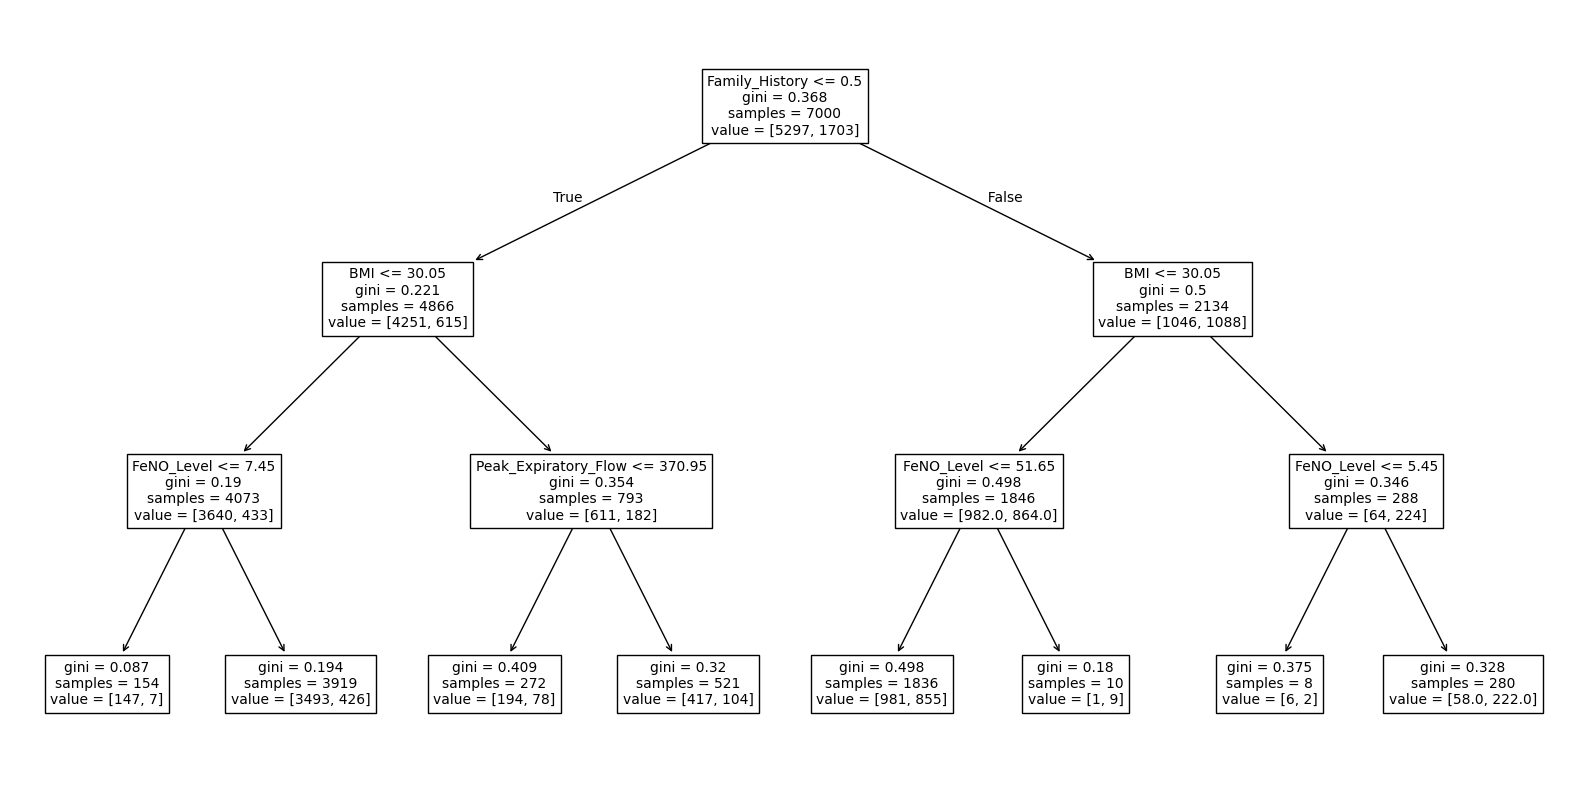

In [71]:
f1 = num_data.columns
plt.figure(figsize=(20,10))
tree.plot_tree(modelTwo,feature_names=f1, fontsize=10)
plt.show()

In [72]:
predTwo = modelTwo.predict(x_test)

In [73]:
metrics.accuracy_score(predTwo, y_test)

0.788

In [74]:
print(metrics.classification_report(predTwo, y_test))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      2842
           1       0.17      0.80      0.28       158

    accuracy                           0.79      3000
   macro avg       0.58      0.79      0.58      3000
weighted avg       0.94      0.79      0.84      3000



#### adding class weight parameter

In [75]:
modelThree  = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
modelThree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


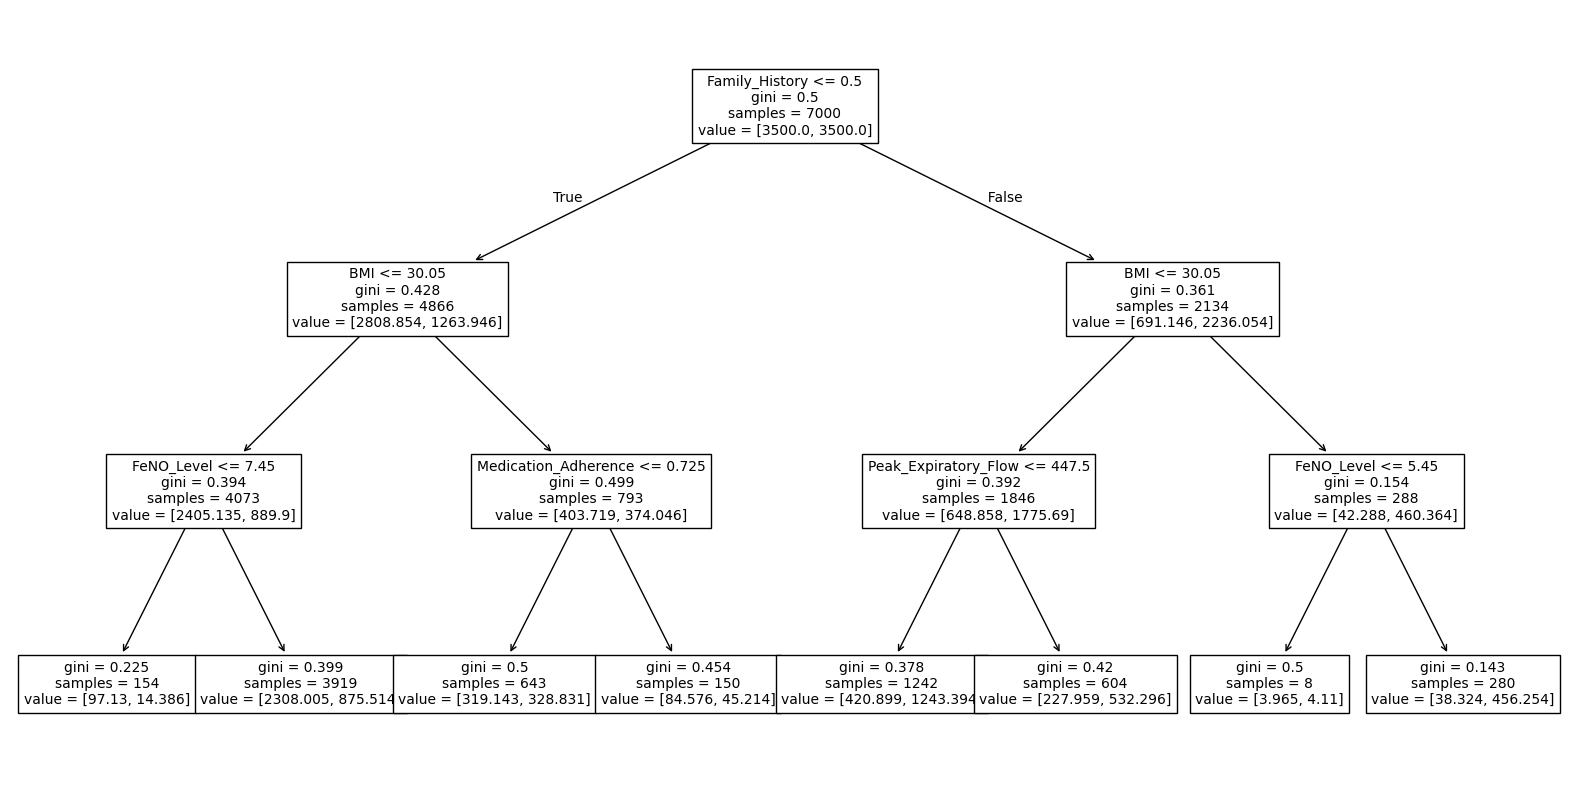

In [76]:
f1 = num_data.columns
plt.figure(figsize=(20,10))
tree.plot_tree(modelThree,feature_names=f1, fontsize=10)
plt.show()

In [77]:
predThree = modelThree.predict(x_test)

In [78]:
metrics.accuracy_score(predThree, y_test)

0.7113333333333334

In [79]:
print(metrics.classification_report(predThree, y_test))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1852
           1       0.69      0.44      0.54      1148

    accuracy                           0.71      3000
   macro avg       0.71      0.66      0.66      3000
weighted avg       0.71      0.71      0.69      3000



#### setting criterion to Entropy, max_depth=3 and max_features to sqrt while class_weight=balanced parameter

In [80]:
modelFour  = DecisionTreeClassifier(criterion='entropy', max_depth=3, class_weight='balanced', max_features="sqrt")
modelFour.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


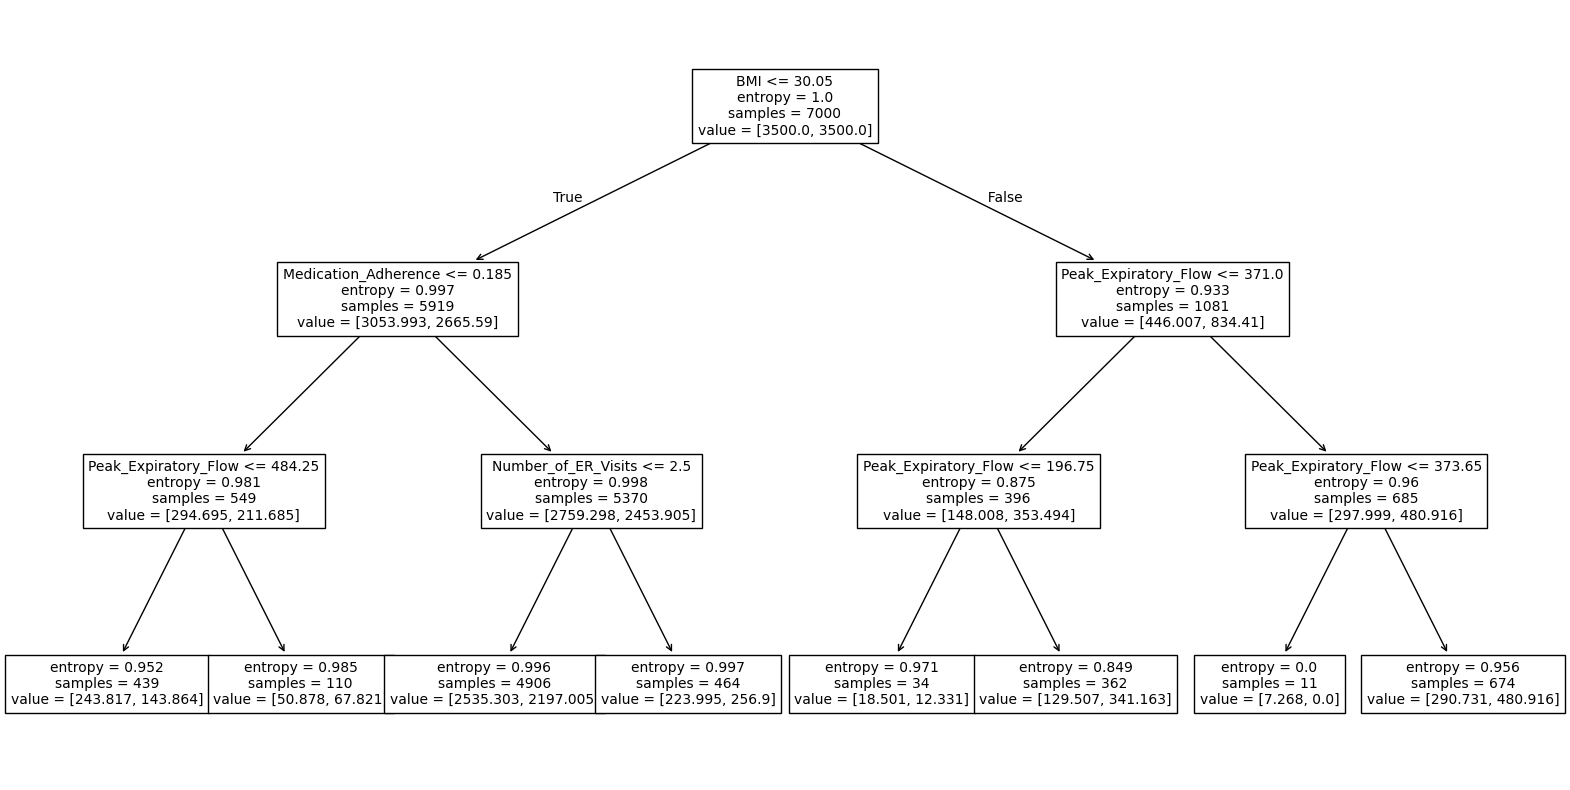

In [81]:
f1 = num_data.columns
plt.figure(figsize=(20,10))
tree.plot_tree(modelFour,feature_names=f1, fontsize=10)
plt.show()

In [82]:
predFour= modelFour.predict(x_test)

In [83]:
metrics.accuracy_score(predFour, y_test)

0.6846666666666666

In [84]:
print(metrics.classification_report(predFour, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2318
           1       0.32      0.34      0.33       682

    accuracy                           0.68      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.69      0.68      0.69      3000



## Imbalance Dataset Management

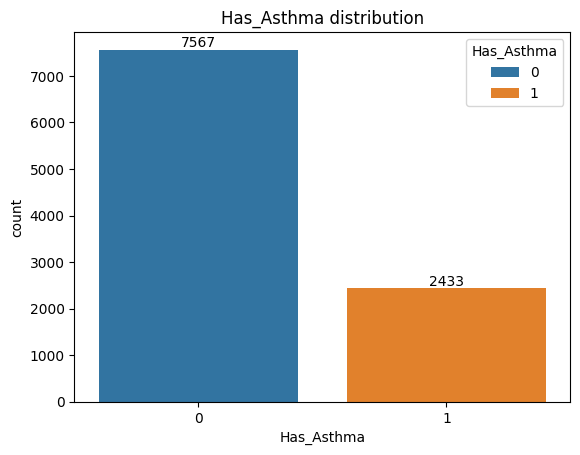

In [85]:
ax = sb.countplot(x="Has_Asthma", data=num_data, hue="Has_Asthma")
plt.title("Has_Asthma distribution")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
sm = SMOTE(random_state=42)

In [88]:
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

C:\Users\kanja\AppData\Local\Temp\ipykernel_28432\1589387432.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())


In [89]:
print(f"After Oversampling x_train shape {x_train_res.shape}")
print(f"After Oversampling y_train shape {y_train_res.shape}")
print()
print(f"After Oversampling count of 1 {sum(y_train_res == 1)}")
print(f"After Oversampling count of 0 {sum(y_train_res == 0)}")

After Oversampling x_train shape (10594, 7)
After Oversampling y_train shape (10594,)

After Oversampling count of 1 5297
After Oversampling count of 0 5297


In [126]:
balancedModel  = DecisionTreeClassifier(max_depth=3)
balancedModel.fit(x_train_res, y_train_res.ravel())

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


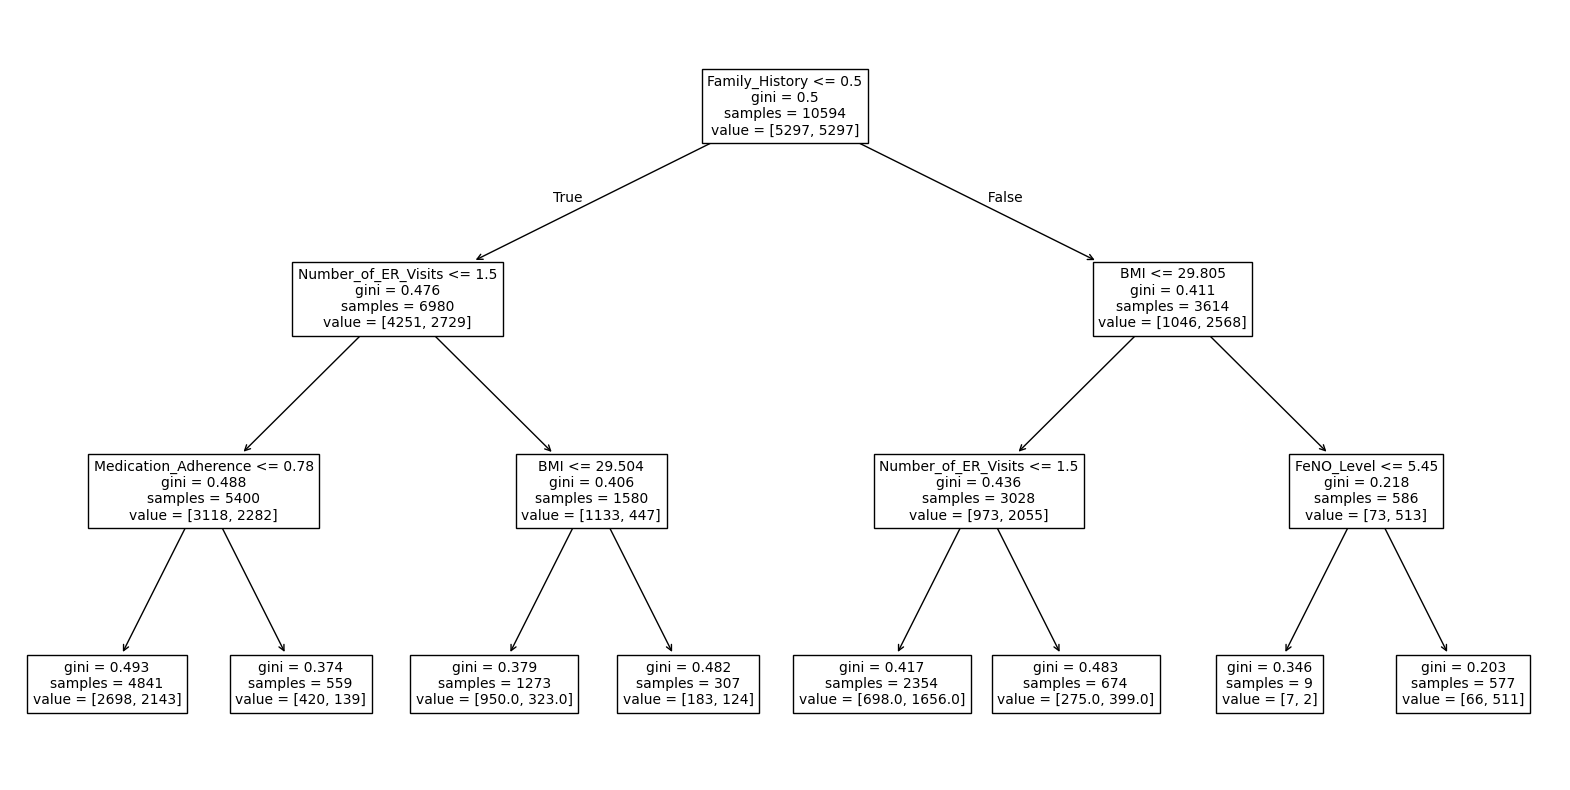

In [127]:
f1 = num_data.columns
plt.figure(figsize=(20,10))
tree.plot_tree(balancedModel,feature_names=f1, fontsize=10)
plt.show()

In [128]:
balancedPred= balancedModel.predict(x_test)

In [129]:
metrics.accuracy_score(balancedPred, y_test)

0.762

In [130]:
print(metrics.classification_report(balancedPred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2104
           1       0.62      0.51      0.56       896

    accuracy                           0.76      3000
   macro avg       0.72      0.69      0.70      3000
weighted avg       0.75      0.76      0.75      3000

